In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pre_path = "output/"
preModes = ['NORMAL', 'AGGRESSIVE', 'MIX_UP']
tailModes = ['true', 'false']

sensitivityModes = ['CHOICES', 'BARGAIN_FACTOR', 'BARGAIN_ROUNDS']

bargain_rounds = [2,3,4,5,6]
choices = [2,3,4,5,6]
bargain_factor = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

expRound = [i for i in range(1,1001)]

In [27]:
def mean_ignore_zeros(series):
    filtered_values = series[series > 0]
    if len(filtered_values) > 0:
        return filtered_values.mean()
    else:
        return 0

def get_mean_data(folderPath):
    datas = []
    
    for i in expRound:
        df = pd.read_csv(folderPath + i.__str__() + '.csv', header=1, usecols=lambda column: column != 'id')
        # df_numeric = df.select_dtypes(include=[float, int])
        # df_numeric = df_numeric.fillna(0)
        # df_numeric = df_numeric.astype(float)
        df = df.fillna(0)
        datas.append(df)
    
    max_len = max([len(d) for d in datas])
    
    for i in range(len(datas)):
        datas[i] = datas[i].reindex(range(max_len), fill_value=0)
    
    combined_data = pd.concat(datas, axis=0)
    
    mean_df = combined_data.groupby(combined_data.index).apply(lambda x: x.apply(mean_ignore_zeros))
    
    return mean_df



In [28]:
all_mean_data = []
for preMode in preModes:
    for tailMode1 in tailModes:
        for tailMode2 in tailModes:
            folderPath = pre_path + preMode + '-' + preMode + '-' + tailMode1 + '-' + tailMode2 + '/'
            all_mean_data.append(get_mean_data(folderPath))
print(len(all_mean_data))

12


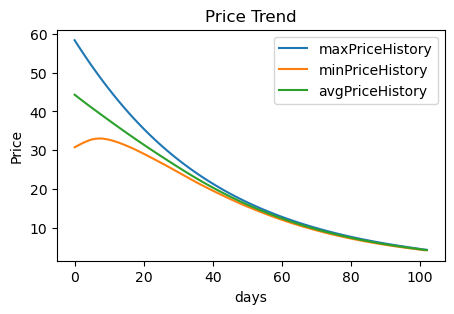

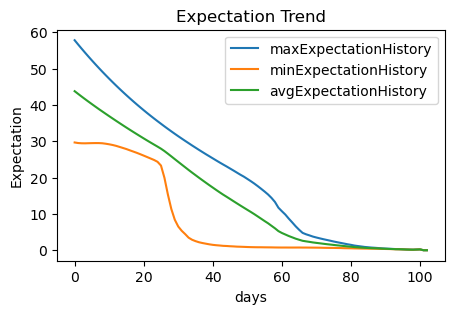

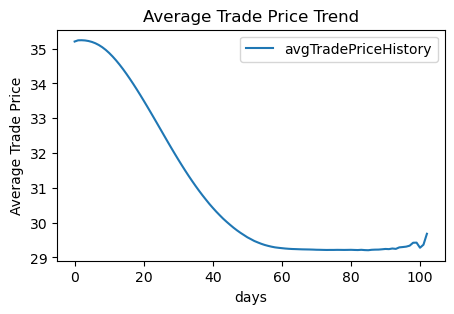

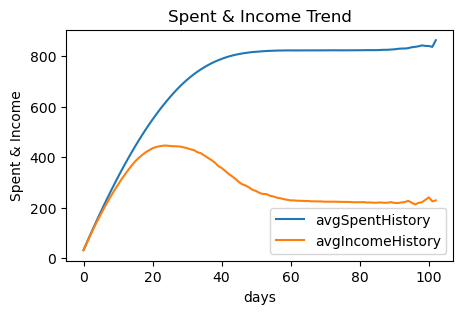

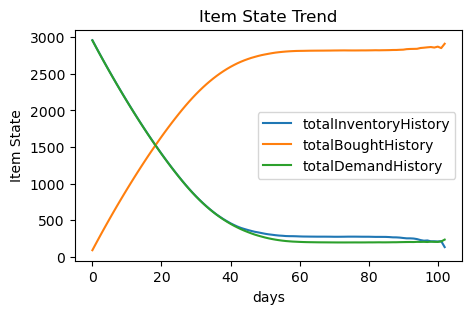

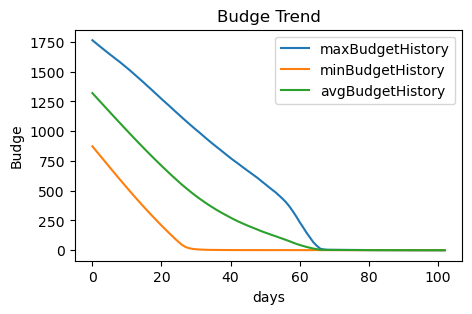

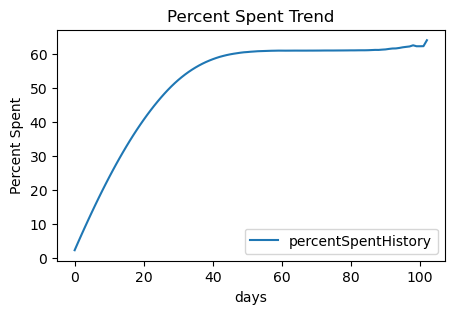

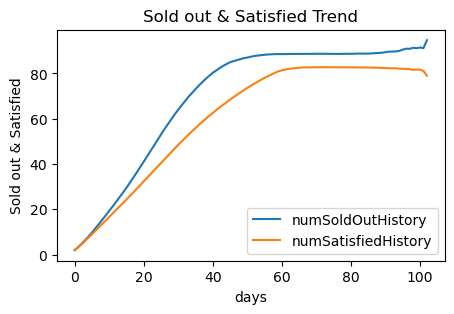

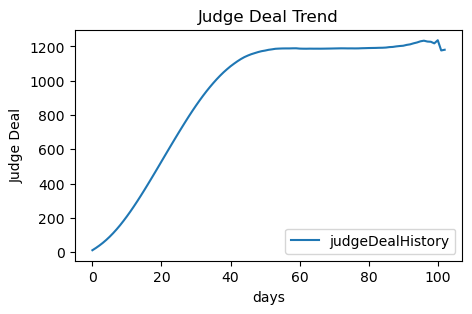

In [33]:
def plot_column(name, columns_pair):
    plt.figure(figsize=(5, 3))
    for column, column_name in columns_pair:
        plt.plot(column, label=column_name)
    plt.legend(loc='best')
    plt.xlabel('days')
    plt.ylabel(name)
    plt.title(name + ' Trend')
    plt.show()

column_names = {'Price': ['maxPriceHistory', 'minPriceHistory', 'avgPriceHistory'], 
                'Expectation': ['maxExpectationHistory', 'minExpectationHistory', 'avgExpectationHistory'],
                'Average Trade Price': ['avgTradePriceHistory'], 
                'Spent & Income': ['avgSpentHistory', 'avgIncomeHistory'],
                'Item State': ['totalInventoryHistory', 'totalBoughtHistory', 'totalDemandHistory'],
                'Budge': ['maxBudgetHistory', 'minBudgetHistory', 'avgBudgetHistory'],
                'Percent Spent': ['percentSpentHistory'], 
                'Sold out & Satisfied': ['numSoldOutHistory', 'numSatisfiedHistory'],
                'Judge Deal': ['judgeDealHistory']}

for key, value in column_names.items():
    column_pairs = []
    for column_name in value:
        pair = (all_mean_data[0][column_name], column_name)
        column_pairs.append(pair)
    plot_column(key, column_pairs)
